In [120]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re

In [82]:
mails = pd.read_csv('spam.csv',encoding = 'latin-1')
mails.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
mails['label_num'] = mails.label.map({'ham':0,'spam':1})
mails.label_num.value_counts(normalize = True)
mails.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [95]:
# create the binary labels
mails['b_label'] = mails['label'].map({'ham': 0, 'spam': 1})

In [105]:
Z = mails['b_label'].to_numpy()

In [106]:
GP_vectorize_count = CountVectorizer(decode_error='ignore')

In [109]:
K = GP_vectorize_count.fit_transform(mails['message'])

In [110]:
Ktrain, Ktest, Ztrain, Ztest = train_test_split(K, Z, test_size=0.33)

In [111]:
model = MultinomialNB()
model.fit(Ktrain, Ztrain)

MultinomialNB()

In [123]:
print("train score:", model.score(Ktrain, Ztrain))

train score: 0.9955406911928651


In [124]:
print("test score:", model.score(Ktest, Ztest))

test score: 0.9751131221719457


In [115]:
def visualize(label):
  words = ''
  for msg in mails[mails['label'] == label]['message']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

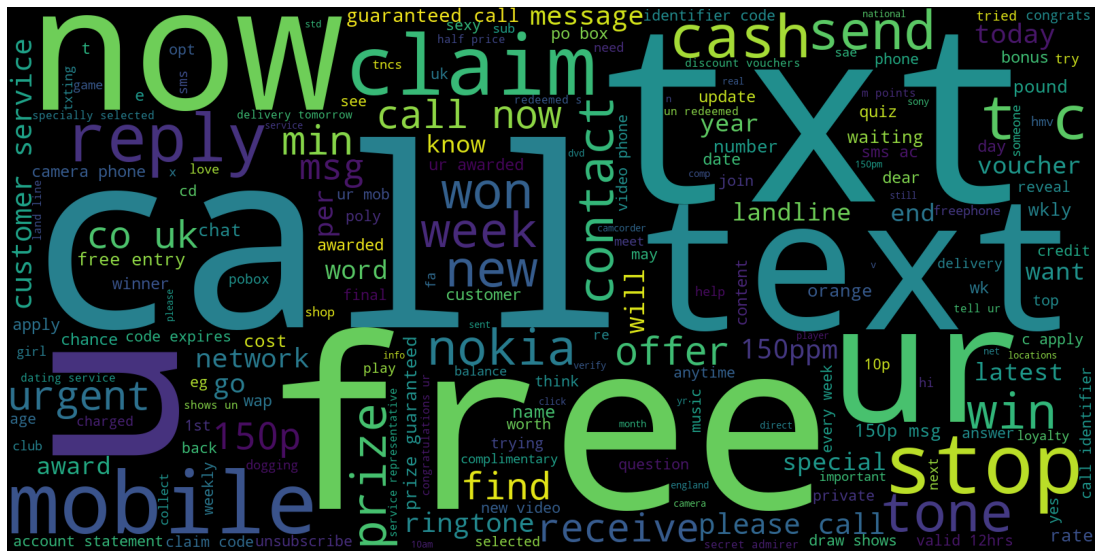

In [116]:
visualize('spam')

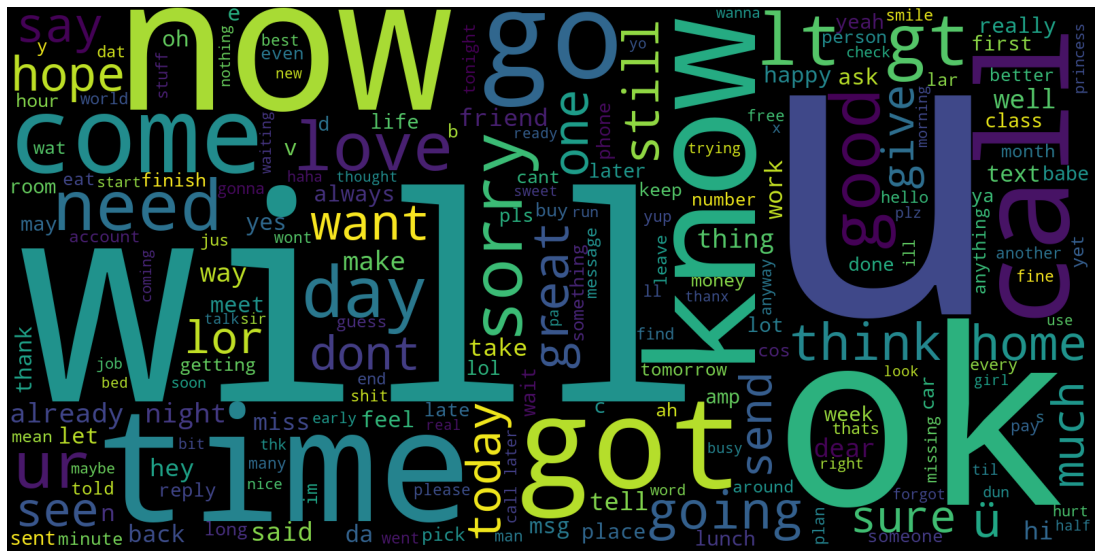

In [117]:
visualize('ham')